# Analysis of the Titanic accident.


## Introduction

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of the 15th of April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. This disaster lead to better maritime laws and safety measures.
The Titanic had three classes of passenegers, and other than Southampton there were two more points of boarding, Cherbourg and Queenstown.

Note: This project uses the 'Titanic' dataset provided by udacity.

The intention of this analysis is to answer some questions like, 

1. How many people survived the accident?
2. Which gender had the higher count of survival?
3. Was age a factor for survival?
4. Did people of a certain class have a higher rate of survival?

Let us import the required libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
# Importing the Data Set:
file_name = pd.read_csv('titanic-data.csv')
titanic_df=pd.DataFrame(file_name)
# Displaying a few rows of the Data Set
titanic_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


## Defining the Data Variables

survived: Passengers who survived. 0=Passenger Dead, 1= Passenger Survived

pclass: Ticket class 1,2,3 in decreasing order of cost. 

PassengerId: Unique ID for each passeanger.

sex: Gender of the passenger.

age: Age of the passenger.

ticket: Ticket Number.

fare: Fare of the ticket.

embarked: The port of embarkment. S-Southampton, C-Cherbourg and Q-Queenstown.

cabin: Cabin number.

In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is observed that the number of passengers is 891 is the Passenger ID count is 891 But the Age column contains just 714 entries. This indicates that the age details of 177 passengers has been lost or not recorded. This problem can be resolved with Data Wrangling.

## Data Wrangling


Here we shall try to identify the missing entries and either fill them up or remove them alltogether.

In [4]:
# Missing entries
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Filling the missing embarked entries with unknown.
titanic_df['Embarked'].fillna("unknown",inplace=True)

In [6]:
# Filling the missing Cabin entries with unknown.
titanic_df['Cabin'].fillna("unknown",inplace=True)

In [7]:
# For Age, it would be better to fill in the empty entries with the mean age
# instead of Unknown.
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [8]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

There are no more missing entries. 
Also, simce there were too many missing entries in the Cabin column, its not reliable to work on it. Let us remove it for good.

In [17]:
titanic_df.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


## Exploratory and Visual Analysis.

### 1. Total number of people who survived:

Now let us write code to find out the number of passengers on the ship and compare it with those who survived.


Number of passengers survived: 342

Number of passengers who died: 549


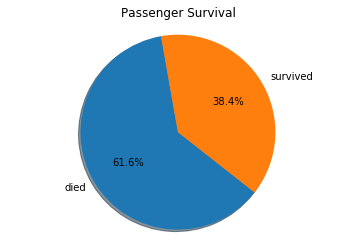

In [20]:
labels = 'died', 'survived'
survivedpie = titanic_df.Survived.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True,
                                                         startangle=100)
survivedpie.axis('equal')
survivedpie.set_ylabel('')
survivedpie.set_title('Passenger Survival')
print '\nNumber of passengers survived:',len(titanic_df.loc[titanic_df['Survived']==1])
print "\nNumber of passengers who died:",titanic_df['Survived'].count()-len(titanic_df.loc[titanic_df['Survived']==1])

### 2. Analysis of Gender and Survival by Gender:

In [10]:
# Passengers travelled.
print "Total number of males and females on board:"
fem=len(titanic_df.loc[titanic_df['Sex']=='female'])
male=len(titanic_df.loc[titanic_df['Sex']=='male'])
print "Males=",male, 'and Females=',fem

Total number of males and females on board:
Males= 577 and Females= 314


In [11]:
# Passengers Survived.
print '\nSurvival count based on Gender'
print titanic_df.groupby('Sex')['Survived'].sum()
print '\nSurvival rate based on Gender'
print titanic_df.groupby('Sex')['Survived'].mean()


Survival count based on Gender
Sex
female    233
male      109
Name: Survived, dtype: int64

Survival rate based on Gender
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Visualization can help better understand the above numbers and impact of gender on chance of survival.

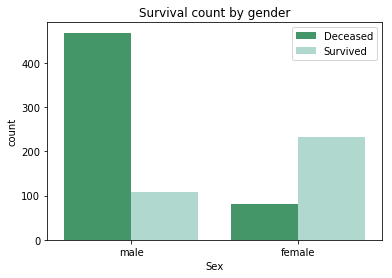

In [12]:
gender_plot=sns.countplot(x='Sex',hue='Survived',data=titanic_df,palette='BuGn_r')
gender_plot.legend(['Deceased','Survived'],title='')
gender_plot.set_title('Survival count by gender');

It is clear that the survival count of females is much higher than that of males. Also, the survival rate of females is 74.2%, while that of males is only 18.8%

### 3. Relation of age and survival.

The following code will try to discover whether age was a deciding factor in the passenger survival rate.

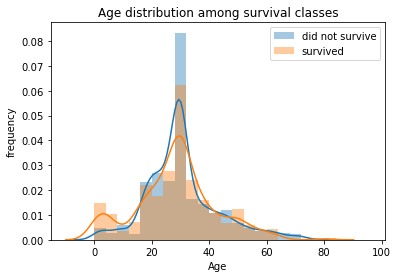

In [21]:
age_bins = np.arange(0, 100, 4)
sns.distplot(titanic_df.loc[(titanic_df['Survived']==0) & (~titanic_df['Age'].isnull()),'Age'], bins=age_bins)
sns.distplot(titanic_df.loc[(titanic_df['Survived']==1) & (~titanic_df['Age'].isnull()),'Age'], bins=age_bins)
plt.title('Age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

The majority of the survivors are from the age gorup 20-30. There is a sharp spike in the number of survivors of a younger age.
Very few of the passengers belonging to the age group 65-80 have survived.

### 4. Survival by Class.

Did Socio-Economic standing have an effect on the chace of survival? Lets find out.

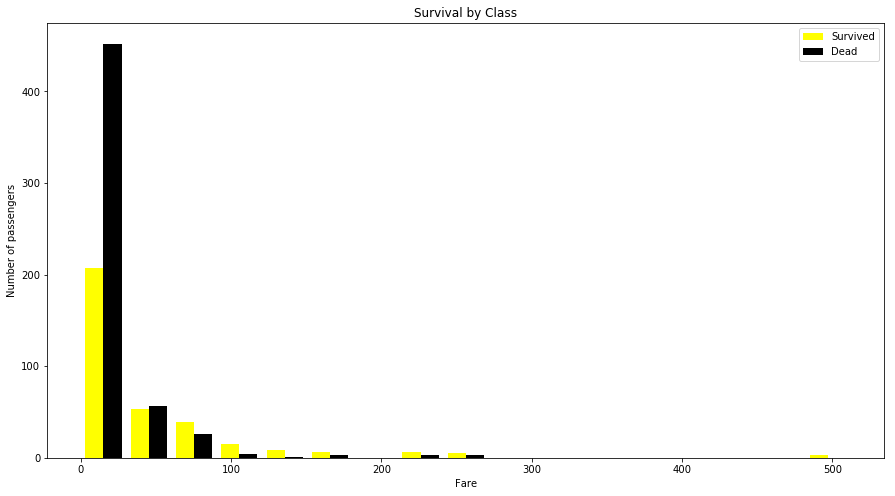

In [24]:
# Plotting survival by fare.
figure = plt.figure(figsize=(15, 8))
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'], titanic_df[titanic_df['Survived']==0]['Fare']], color = ['yellow','black'],
         bins = 17,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Survival by Class')

It is clearly discernible that the passengers who had paid a higher fee, in other words, passengers who were travelling in a higher class have survived. 
There were almost no survivors from passengers travelling in Class 3.

## Conclusions and Limitations:

A total of 342 passengers survived. The given data is for 891 passengers, while there were 2224 people on board the Titanic. Therefore there might be variations from analysis of complete data.

The survival count of females was much higher than that of males. This indicates that priority was given to female passengers as general courtesy was followed even in times of distress.

The passengers mean age and the median survival age were betwwen 28 and 30, therefore most of the passengers were between that age group. Hence most of the survivors too were from that age group. 

The fare difference was a huge factor in the chance of survival. There were more  passengers in the lower classes but less survivors. So, if there were more passengers in the 1st class there mightt have been more survivors. It seems that  1st class passengers were given priority for boarding the life boats.

Also, no data is availabl about the crew.

There were too many missing entries in the Cabin column, hence rendering it useless.



##### References

A number of references were used

https://www.kaggle.com/tanvibhandarkar/getting-started-with-titanic![image.png](attachment:image.png)

http://seaborn.pydata.org/tutorial/color_palettes.html

A lot of Stackoverflow

Help from fellow Udacitians

pandas.pydata.org